<a href="https://colab.research.google.com/github/imZiho/Deep-Learning_Seminar/blob/main/CHA06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [3]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# **이진 로지스틱 회귀 모델**

분류 모델은 데이터를 분류하는 방법으로 크게 이진 분류(Binary Classification)와 다중 분류(Multi Classification)로 나뉜다.
두 개의 선택지 중에서 하나를 결정하는 문제를 **이진 분류(Binary Classification)**라고 한다.


그리고 이런 문제를 풀기 위한 대표적인 알고리즘은 **로지스틱 회귀(Logistic Regression)**라고 한다.


**앞장의 선형회귀 모델과 비교하면 예측 모델에 시그모이드 함수의 개념이 추가로 들어간다**

정확도:(정답건수)/(전체건수)


모델이 어느정도 비율로 올바른 예측이 가능한지 수치화할 수 있음

# 시그모이드 함수

**예측결과가 1,예측결과가0이라고 하였을 때 그래프를 그려보면 S자로 시그모이드함수 형태임**

따라서,출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수= 시그모이드 함수(Sigmoid function)

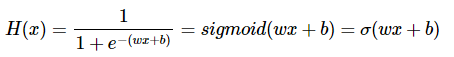

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

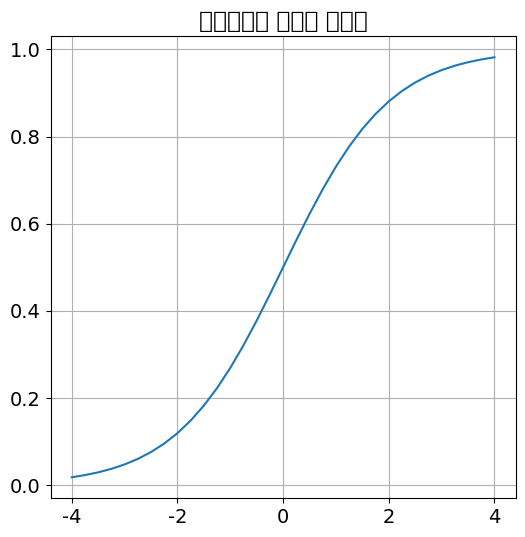

In [34]:
x_np = np.arange(-4,4.1,0.25)           # 넘파이를 이용하여 x_np를 정의한 후
x = torch.tensor(x_np).float()          # 텐서로 변환하여 변수 x에 저장하고
y = torch.sigmoid(x)                    # 그 값을 시그모이드 함수로 y값을 계산해줌 (파이토치에서는 torch.sigmoid를 이용하여 시그모이드 구현가능)

plt.title('시그모이드 함수의 그래프')
plt.plot(x.data,y.data)
plt.show()                              # 그래프는 (0.0.5)를 기준으로 점대칭`

**실습**


**데이터준비**

In [7]:
from sklearn.datasets import load_iris    # 라이브러리를 임포트 해온 후
iris = load_iris()                        # 데이터를 불러오고
x_org,y_org=iris.data,iris.target
print('원본데이터',x_org.shape,y_org.shape)  #결과확인

원본데이터 (150, 4) (150,)


**우리가 사용할 데이터셋은 머신러닝과 통계 분야에서 오래전부터 사용해온 붓꽃iris 데이터셋이다**

**이 데이터는 scikit-learn의 datasets 모듈에 포함되어 있가에 라이브러리를 임포트 해온 후**

**load_iris 함수를 사용해서 데이터를 불러와 결과를 확인해보면
데이터셋에는 총 150개의 데이터가 담겨있고, 각 데이터에는 4개의 정보(sepal,petal의 길이(length)와 폭(width))가 담겨있는것을 확인할 수 있습니다)**

In [9]:
# 데이터 추출
x_data = iris.data[:100,:2]   # [행:열: 인덱스 범위]  # 이제 데이터르 추출해줄건데 100행,2열까지만 추출함
y_data = iris.target[:100]
print('대상 데이터',x_data.shape,y_data.shape)

대상 데이터 (100, 2) (100,)


In [35]:
# 훈련데이터와 검증 데이터의 분할
print(x_data.shape,y_data.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


**우리는 이 모델의 예측을 신뢰할 수 있는지 알아야 한다.
따라서 모델의 성능을 측정하려면 이전에 본 적 없는 새 데이터를 모델에 적용해봐야 한다.**

**이를 위해 우리가 가지고 있는 레이블된 데이터(150개의 붓꽃 데이터)를 두 그룹으로 하나는 머신러닝 모델을 만들 때 사용하는 훈련 데이터, 나머지는 모델이 얼마나 잘 작동하는지 측정하는 데 사용하는 테스트 데이터로 나눔**


**scikit-learn은 데이터셋을 섞어서 나눠주는 train_test_split 함수를 제공한다**


이 함수는 전체 행 중 75% 를 레이블 데이터와 함께 훈련 세트로 뽑고,
나머지 25%는 레이블 데이터와 함께 테스트 세트가 된다.

나누는 비율에 관한 정해진 규칙은 없지만 대부분 훈련:검증을 대략 7:3이나 6:4로 나눈것이 일반적.


**따라서 train_test_split 모듈을 임포트 해온 후 train_test_split 함수의 반환값은 X_train, X_test, y_train, y_test이며 모두 NumPy 배열입니다. **



**이 위의 코드로 데이터를 훈련용과 검증데이터로 나눈 후 결과를 확인해보면 70개의 학습데이터 30개의 테스트데이터로 나누어진것을 확인할 수 있고 이러한 분리된 검증데이터는 모델의 정확도를 평가하는 목적으로만 사용된다**

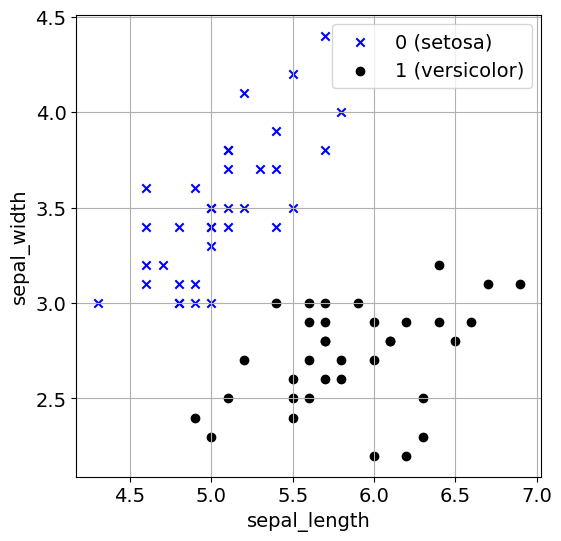

In [11]:
# 산포도출력
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

산포도 출력결과 두 그룹으로 분할이 가능해보이는것을 확인할 수 있다

**모델정의**

In [36]:
#입출력 차원수의 정의
n_input = x_train.shape[1]
n_output = 1
print(f'n_input:{n_input}n_output:{n_output}')

n_input:2n_output:1


In [37]:
# 2입력1출력의 로지스틱 회귀 모델(모델구현)

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        # 초깃값을 전부 1로 함
        # "딥러닝을 위한 수학"과 조건을 맞추기 위한 목적
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    # 예측 함수 정의
    def forward(self, x):
        # 선형 함수에 입력값을 넣고 계산한 결과
        x1 = self.l1(x)
        # 계산 결과에 시그모이드 함수를 적용
        x2 = self.sigmoid(x1)
        return x2

In [27]:
net = Net(n_input, n_output)

In [28]:
print(net)  #모델 개요 표시방법

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [29]:
summary(net, (2,))   #모델 개요 표시방법

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [30]:
#최적화 알고리즘과 손실 함수의 정의
criterion = nn.BCELoss()      # 분류모델에서 손실함수는 교차 엔트로피 함수를 이용한다

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

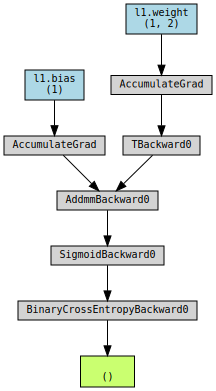

In [31]:
# 입력 데이터 x_train과 정답 데이터 y_train의 텐서화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

# 정답 데이터는 N행 1열 행렬로 변환
labels1 = labels.view((-1,1))

# 검증 데이터의 텐서화
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

# 검증용 정답 데이터도 N행 1열 행렬로 변환
labels1_test = labels_test.view((-1,1))

# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels1)

# 손실을 계산 그래프로 출력
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [32]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.BCELoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10000

# 기록용 리스트 초기화
history = np.zeros((0,5))

In [33]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    # 훈련 페이즈

    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels1)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 손실 저장(스칼라 값 취득)
    train_loss = loss.item()

    # 예측 라벨(1 또는 0) 계산
    predicted = torch.where(outputs < 0.5, 0, 1)

    # 정확도 계산
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels1_test)

    # 손실 저장(스칼라 값 취득)
    val_loss =  loss_test.item()

    # 예측 라벨(1 또는 0) 계산
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 정확도 계산
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], loss: 2.84329 acc: 0.50000 val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419, val_acc: 0.16667
Epoch [120/10000], loss: 0.